In [2]:
import pandas as pd

# Load the combined preprocessed data
df = pd.read_csv("C:/Users/Shefali/OneDrive/Desktop/Criminal-Deception-Project/outputs/combined_clean_preprocessed.csv")

# Check the first few rows to ensure it loaded correctly
df.head()


,text,label,source,clean_text
0,The largest low-wage employer is not McDonalds...,0,LIAR,largest lowwage employer mcdonalds walmart us ...
1,A majority in every state favors path to citiz...,1,LIAR,majority every state favors path citizenship u...
2,Says some [states] with the largest reductions...,1,LIAR,says states largest reductions crime also lowe...
3,Chris Koster opposed protecting the women of M...,1,LIAR,chris koster opposed protecting women missouri...
4,So I told the person that I don’t like that I ...,1,MU3D,told person dont like like guy um like footbal...


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Load the dataset (make sure the path is correct)
df = pd.read_csv("C:/Users/Shefali/OneDrive/Desktop/Criminal-Deception-Project/outputs/combined_clean_preprocessed.csv")

# Step 2: Vectorize the 'clean_text' column using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_text = vectorizer.fit_transform(df['clean_text'])

# Step 3: Check the shape of the vectorized data
print("Shape of vectorized data:", X_text.shape)


Shape of vectorized data: (12160, 1000)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the 'clean_text' column using TfidfVectorizer (better for text classification)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_text = vectorizer.fit_transform(df['clean_text'])

# Target variable
y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")



Train set: (8512, 1000), Test set: (3648, 1000)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.647203947368421

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.49      0.52      1402
           1       0.70      0.74      0.72      2246

    accuracy                           0.65      3648
   macro avg       0.62      0.62      0.62      3648
weighted avg       0.64      0.65      0.64      3648


Confusion Matrix:
 [[ 690  712]
 [ 575 1671]]


In [9]:


from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
  'n_estimators': [100, 200, 300],
  'max_depth': [10, 20, 30],
  'min_samples_split': [2, 5, 10]
}

# Grid search with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate with best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nAccuracy with best model:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}

Accuracy with best model: 0.6433662280701754


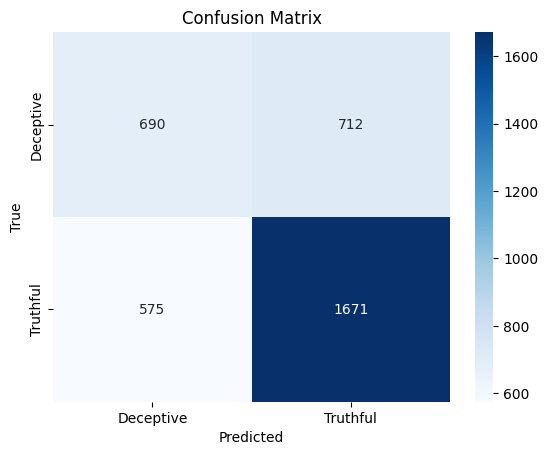

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Deceptive", "Truthful"], yticklabels=["Deceptive", "Truthful"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


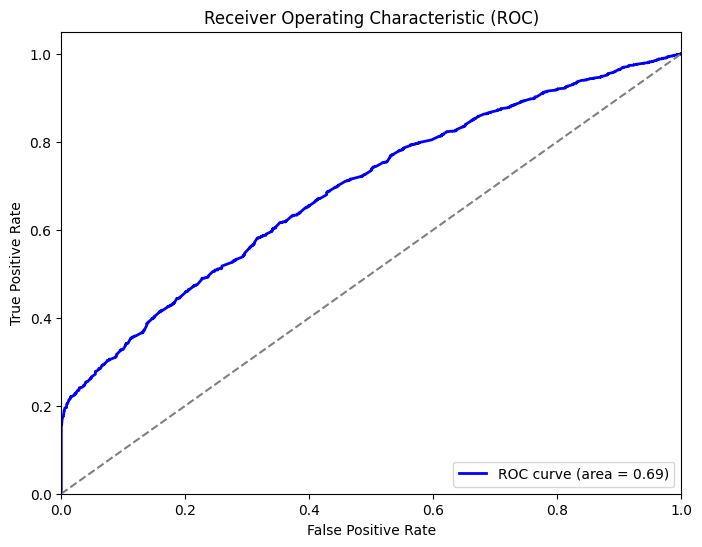

In [11]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
